In [105]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from numpy import random
from datetime import datetime
from math import nan
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import statsmodels.api as sm

%matplotlib inline
warnings.filterwarnings('ignore')

In [106]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [107]:
sns.set_style("whitegrid")

### 1. Import and clean data preliminarily

In [108]:
model_df1 = pd.read_csv('../dataset/model_df1.csv')

In [109]:
model_df1.shape

(21361, 74)

In [110]:
model_df1.head()

,match_api_id,dribbling_CB_home,dribbling_GK_home,dribbling_MF_home,dribbling_SB_home,dribbling_ST_home,dribbling_W_home,sprint_speed_CB_home,sprint_speed_GK_home,sprint_speed_MF_home,sprint_speed_SB_home,sprint_speed_ST_home,sprint_speed_W_home,passing_CB_home,passing_GK_home,passing_MF_home,passing_SB_home,passing_ST_home,passing_W_home,shooting_CB_home,shooting_GK_home,shooting_MF_home,shooting_SB_home,shooting_ST_home,shooting_W_home,defence_CB_home,defence_GK_home,defence_MF_home,defence_SB_home,defence_ST_home,defence_W_home,goalkeeping_CB_home,goalkeeping_GK_home,goalkeeping_MF_home,goalkeeping_SB_home,goalkeeping_ST_home,goalkeeping_W_home,dribbling_CB_away,dribbling_GK_away,dribbling_MF_away,dribbling_SB_away,dribbling_ST_away,dribbling_W_away,sprint_speed_CB_away,sprint_speed_GK_away,sprint_speed_MF_away,sprint_speed_SB_away,sprint_speed_ST_away,sprint_speed_W_away,passing_CB_away,passing_GK_away,passing_MF_away,passing_SB_away,passing_ST_away,passing_W_away,shooting_CB_away,shooting_GK_away,shooting_MF_away,shooting_SB_away,shooting_ST_away,shooting_W_away,defence_CB_away,defence_GK_away,defence_MF_away,defence_SB_away,defence_ST_away,defence_W_away,goalkeeping_CB_away,goalkeeping_GK_away,goalkeeping_MF_away,goalkeeping_SB_away,goalkeeping_ST_away,goalkeeping_W_away,result
0,483130,51.0,21.0,73.50,51.0,74.5,68.0,72.0,67.0,74.50,76.5,78.5,71.5,59.67,41.33,78.00,62.67,64.17,74.33,53.50,19.8,74.30,60.3,65.7,70.70,77.62,29.50,66.62,81.50,49.38,78.88,27.8,81.0,31.10,28.3,26.4,30.4,33.5,25.0,55.50,60.50,65.5,66.0,63.0,44.0,72.50,73.5,67.0,76.00,51.67,44.67,73.00,67.33,53.17,71.00,48.2,25.0,55.30,51.9,64.0,68.3,69.42,33.75,70.75,64.50,36.71,61.75,25.7,73.0,29.30,26.40,22.9,26.0,win
1,483131,36.5,22.0,63.50,26.0,57.5,62.0,61.0,34.0,70.00,51.0,70.5,62.0,53.17,38.33,63.17,43.33,57.67,64.75,42.70,22.0,46.90,40.7,68.0,63.35,64.50,30.33,45.42,59.12,48.12,55.81,23.1,72.2,26.20,16.5,19.0,19.0,42.5,21.0,54.00,48.00,61.0,65.5,61.0,21.0,77.00,73.0,73.0,68.75,63.83,37.33,59.00,61.33,49.33,59.50,57.2,19.2,52.60,61.3,71.0,60.1,69.50,18.75,66.50,63.62,32.50,34.12,28.9,69.4,25.33,28.60,19.2,25.7,win
2,483133,58.0,22.0,75.67,60.5,88.0,78.5,77.0,24.0,71.33,78.0,85.0,78.0,71.00,41.00,76.00,77.33,68.67,79.17,57.70,22.4,72.40,67.1,81.4,67.80,75.31,19.75,57.42,74.38,42.75,67.00,30.9,81.4,22.93,26.0,22.4,30.4,51.5,22.0,66.00,45.50,47.0,67.0,66.5,32.0,69.33,67.5,66.0,73.00,68.67,38.67,66.89,60.50,54.00,59.33,59.7,21.0,61.73,46.7,38.2,67.4,72.25,31.50,60.33,70.50,63.50,33.62,28.1,74.6,26.93,26.80,22.0,25.3,win
3,483134,35.5,44.0,79.00,33.0,67.5,36.0,66.5,63.0,75.50,38.0,73.5,68.0,51.67,66.67,68.17,53.17,62.00,63.67,49.35,41.8,60.30,34.6,66.5,48.60,71.50,65.75,35.38,51.88,37.38,68.50,26.0,27.0,17.50,41.9,25.3,28.4,51.0,21.0,78.50,68.25,66.0,69.0,68.0,48.0,74.00,77.0,81.0,74.50,53.17,40.33,77.67,71.25,56.33,74.50,43.3,18.4,62.40,65.2,64.9,53.9,71.88,24.50,68.88,74.50,28.25,65.38,23.7,80.4,30.00,28.75,16.5,28.9,win
4,483135,55.0,22.0,62.33,42.5,57.0,76.5,75.0,52.0,71.67,64.0,64.0,78.5,71.00,38.33,64.78,49.33,48.00,69.50,49.90,19.2,57.47,49.8,61.4,71.30,80.38,29.00,62.75,47.75,39.75,40.50,29.5,77.6,28.67,23.2,23.0,25.0,53.0,22.0,71.33,61.00,75.0,66.5,69.5,57.0,80.00,80.5,84.0,69.50,65.00,37.00,74.78,70.50,65.67,63.83,52.9,19.2,69.93,61.2,65.2,67.1,77.50,29.25,66.92,72.62,37.75,60.38,28.8,67.2,29.40,28.60,26.2,28.3,tie


In [111]:
model_df1['result'].value_counts()

win     9804
lose    6161
tie     5396
Name: result, dtype: int64

- Home win has more observations than home lose

In [112]:
#drop columns that have less significant influence on match result by common sense
columns = matches_combined.columns
new_columns = [col for col in columns if 'dribbling_GK' not in col
                                  and 'sprint_speed_GK' not in col
                                  and 'passing_speed_GK' not in col
                                  and 'shooting_GK' not in col 
                                  and 'defence_GK' not in col
                                  and 'passing_GK' not in col
                                  and 'dribbling_CB' not in col
                                  and 'sprint_speed_CB' not in col
                                  and 'passing_speed_CB' not in col
                                  and 'shooting_CB' not in col
                                  and 'shooting_SB' not in col                         
                                  and 'defence_ST' not in col
                                  and 'defence_W' not in col
                                  and 'sprint_speed_MF' not in col
                                  and 'goalkeeping_CB' not in col
                                  and 'goalkeeping_MF' not in col
                                  and 'goalkeeping_SB' not in col
                                  and 'goalkeeping_ST' not in col
                                  and 'goalkeeping_W' not in col]

model_df1 = model_df1[new_columns]

In [113]:
model_df1.isna().sum()

match_api_id               0
dribbling_MF_home          0
dribbling_SB_home       1303
dribbling_ST_home          0
dribbling_W_home        1859
sprint_speed_SB_home    1303
sprint_speed_ST_home       0
sprint_speed_W_home     1859
passing_CB_home            0
passing_MF_home            0
passing_SB_home         1303
passing_ST_home            0
passing_W_home          1859
shooting_MF_home           0
shooting_ST_home           0
shooting_W_home         1859
defence_CB_home            0
defence_MF_home            0
defence_SB_home         1303
goalkeeping_GK_home        0
dribbling_MF_away          0
dribbling_SB_away       1339
dribbling_ST_away          0
dribbling_W_away        1795
sprint_speed_SB_away    1339
sprint_speed_ST_away       0
sprint_speed_W_away     1795
passing_CB_away            0
passing_MF_away            0
passing_SB_away         1339
passing_ST_away            0
passing_W_away          1795
shooting_MF_away           0
shooting_ST_away           0
shooting_W_awa

- Missing data appear on position 'W' and 'SB'. It happened because of unique starting formations. The decision is to drop those rows.

In [114]:
#model_df1.dropna(inplace = True)
#model_df1 = model_df1.reset_index(drop = True)
#model_df1.shape

### 2. Check out outliers

In [115]:
model_df1 = model_df1.drop('match_api_id', axis = 1)
y = model_df1['result']
X = model_df1.drop(['result'], axis = 1)

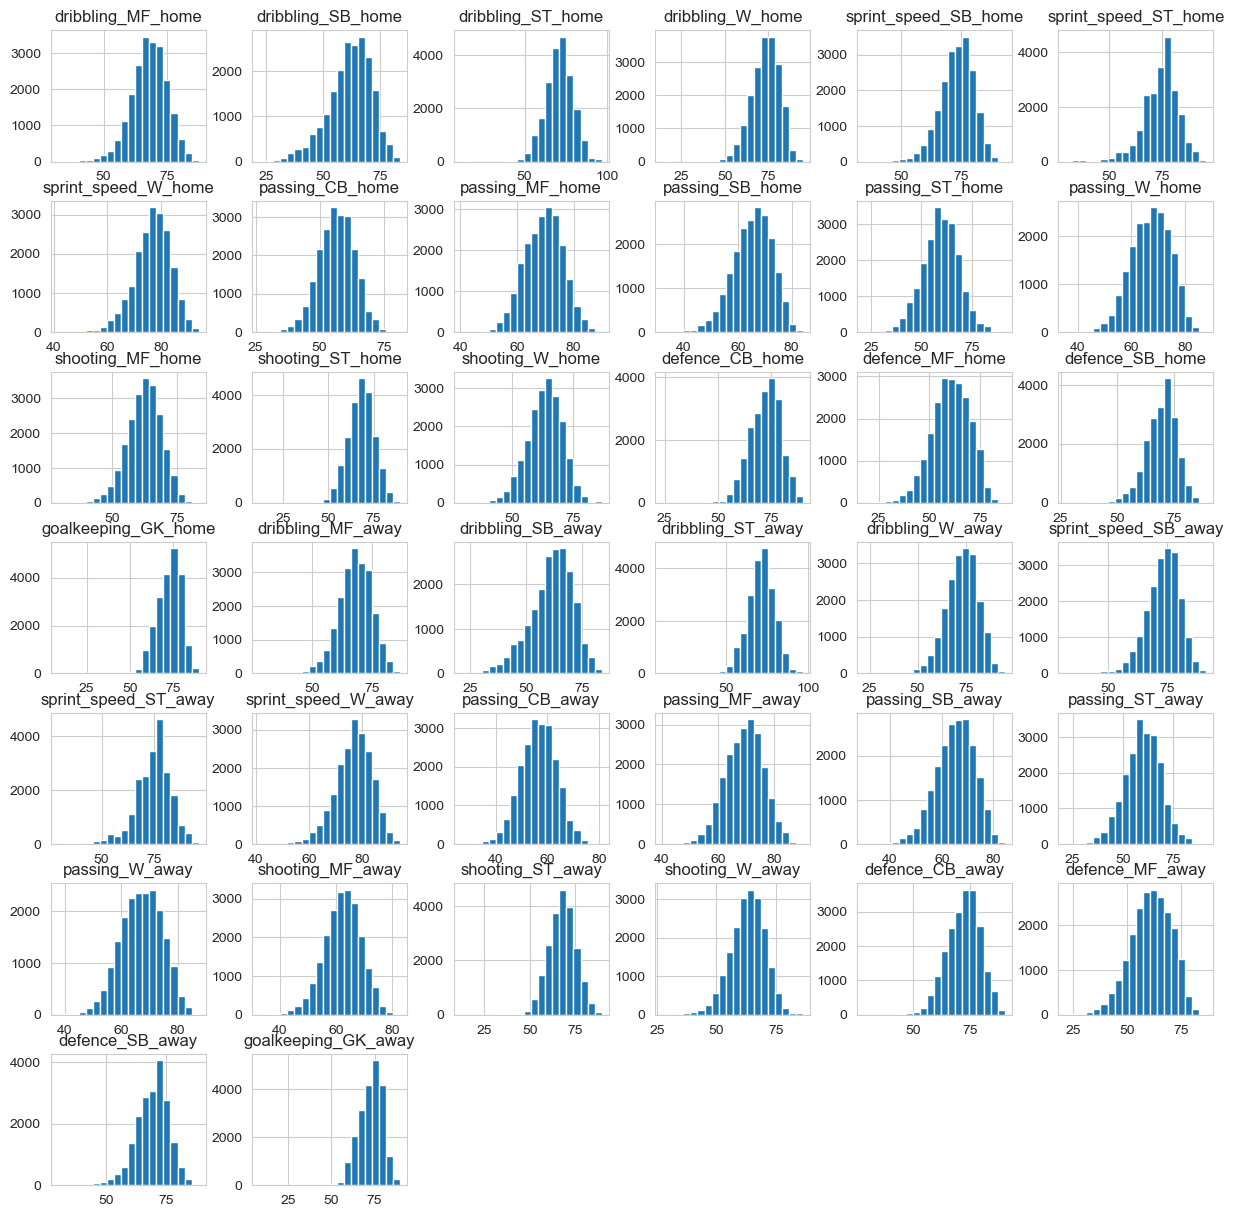

In [116]:
# A quick view of all columns distributions
X.hist(bins=20, figsize=(15, 15))
plt.show()

Most of the distributions are slightly skewed. A few has outliers.

In [117]:
X.describe()

,dribbling_MF_home,dribbling_SB_home,dribbling_ST_home,dribbling_W_home,sprint_speed_SB_home,sprint_speed_ST_home,sprint_speed_W_home,passing_CB_home,passing_MF_home,passing_SB_home,passing_ST_home,passing_W_home,shooting_MF_home,shooting_ST_home,shooting_W_home,defence_CB_home,defence_MF_home,defence_SB_home,goalkeeping_GK_home,dribbling_MF_away,dribbling_SB_away,dribbling_ST_away,dribbling_W_away,sprint_speed_SB_away,sprint_speed_ST_away,sprint_speed_W_away,passing_CB_away,passing_MF_away,passing_SB_away,passing_ST_away,passing_W_away,shooting_MF_away,shooting_ST_away,shooting_W_away,defence_CB_away,defence_MF_away,defence_SB_away,goalkeeping_GK_away
count,21361.000000,20058.000000,21361.000000,19502.000000,20058.000000,21361.000000,19502.000000,21361.00000,21361.000000,20058.000000,21361.000000,19502.000000,21361.000000,21361.000000,19502.000000,21361.000000,21361.000000,20058.000000,21361.000000,21361.000000,20022.000000,21361.000000,19566.000000,20022.000000,21361.000000,19566.00000,21361.000000,21361.000000,20022.000000,21361.000000,19566.000000,21361.000000,21361.000000,19566.000000,21361.000000,21361.000000,20022.000000,21361.000000
mean,67.997908,61.711793,71.111155,73.370606,73.377198,74.239007,76.902872,56.55966,69.429535,65.365091,59.582337,67.189606,62.441374,68.126967,63.319357,72.048686,60.629088,69.340405,72.801877,67.796436,61.492381,71.199907,73.027010,73.304294,74.435063,76.73261,56.595912,69.295088,65.210606,59.680473,67.149549,62.289946,67.969343,63.091156,72.022019,60.886128,69.341941,72.800296
std,6.939935,9.547753,8.189419,8.119905,7.032798,8.419870,6.769133,6.99226,6.703130,7.294727,8.940814,7.331923,6.587449,7.259663,7.123604,7.116830,9.341060,6.784650,6.652223,6.907690,9.575862,8.167044,8.196463,7.080238,8.366070,6.82912,6.946804,6.668540,7.333122,8.947994,7.291713,6.566320,7.355514,7.202851,7.097590,9.362415,6.784271,6.686749
min,32.000000,22.000000,11.000000,14.000000,34.220000,29.200000,41.370000,26.46000,40.170000,31.920000,21.330000,35.250000,28.850000,12.000000,29.000000,23.940000,17.620000,27.080000,8.330000,28.000000,20.750000,11.000000,22.000000,32.000000,29.200000,41.37000,26.460000,40.080000,29.830000,21.330000,37.500000,32.600000,12.000000,27.200000,28.620000,21.250000,29.690000,8.200000
25%,63.630000,56.250000,66.000000,68.122500,69.000000,69.500000,72.835000,51.89000,64.670000,60.580000,53.670000,62.005000,58.250000,63.400000,58.850000,67.170000,54.580000,65.120000,68.300000,63.500000,56.000000,66.000000,67.750000,69.000000,69.750000,72.50000,52.000000,64.580000,60.330000,53.670000,62.080000,58.030000,63.150000,58.500000,67.190000,54.790000,65.090000,68.300000
50%,68.330000,62.750000,71.500000,74.000000,74.000000,75.350000,77.500000,56.67000,69.810000,65.920000,59.750000,67.530000,62.780000,68.400000,63.800000,72.690000,60.940000,70.120000,73.600000,68.070000,62.500000,71.570000,73.520000,74.000000,75.500000,77.25000,56.670000,69.670000,65.800000,59.830000,67.415000,62.600000,68.200000,63.595000,72.620000,61.290000,70.190000,73.600000
75%,72.780000,68.500000,76.330000,79.250000,78.310000,79.500000,81.500000,61.39000,74.100000,70.670000,65.580000,72.670000,67.000000,73.000000,68.250000,77.060000,67.500000,73.960000,77.700000,72.580000,68.250000,76.440000,78.800000,78.250000,79.710000,81.50000,61.330000,74.000000,70.500000,65.670000,72.515000,66.830000,72.900000,68.120000,77.040000,67.770000,73.940000,77.800000
max,87.400000,84.000000,97.000000,95.250000,93.500000,96.000000,94.200000,81.45000,89.920000,84.330000,91.330000,88.000000,83.470000,89.700000,86.500000,89.880000,87.310000,89.250000,89.800000,86.620000,84.000000,97.000000,95.250000,91.500000,96.000000,94.20000,81.000000,90.330000,84.330000,91.330000,87.420000,83.000000,89.700000,86.500000,89.880000,86.500000,88.690000,89.800000


- A few parameters look way below common range. 

In [118]:
z_scores = np.abs((X - X.mean()) / X.std())
outliers = z_scores > 4
outliers_rows = model_df1[outliers.any(axis=1)]

outliers_rows.shape

(560, 39)

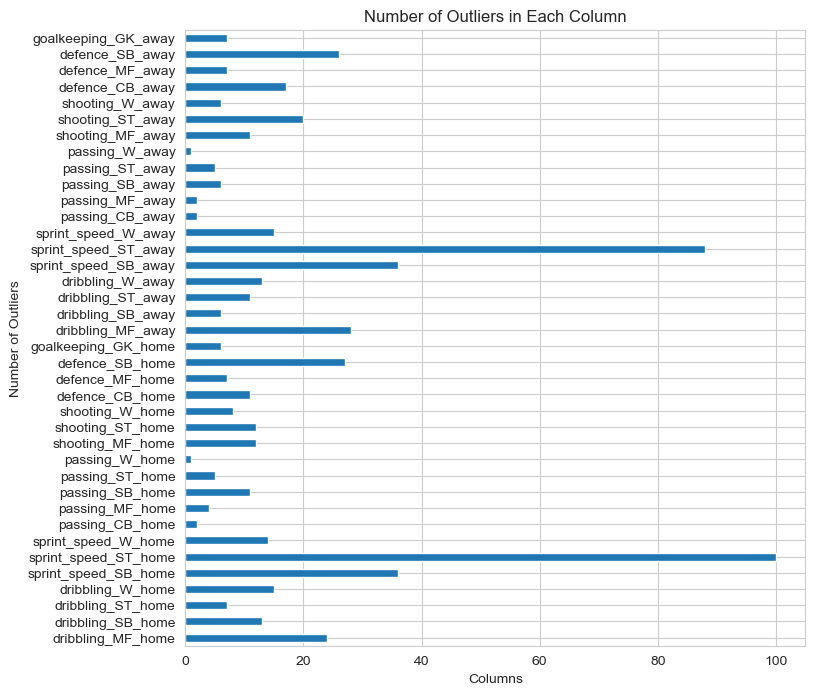

In [119]:
# Check which columns have the most outliers
outlier_counts = outliers.sum()
plt.figure(figsize=(8, 8))
outlier_counts.plot(kind='barh')
plt.xlabel('Columns')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers in Each Column')
plt.show()

Strikers have the most outliers. 
- Check out the situation of one example

In [120]:
outliers_rows.head()

,dribbling_MF_home,dribbling_SB_home,dribbling_ST_home,dribbling_W_home,sprint_speed_SB_home,sprint_speed_ST_home,sprint_speed_W_home,passing_CB_home,passing_MF_home,passing_SB_home,passing_ST_home,passing_W_home,shooting_MF_home,shooting_ST_home,shooting_W_home,defence_CB_home,defence_MF_home,defence_SB_home,goalkeeping_GK_home,dribbling_MF_away,dribbling_SB_away,dribbling_ST_away,dribbling_W_away,sprint_speed_SB_away,sprint_speed_ST_away,sprint_speed_W_away,passing_CB_away,passing_MF_away,passing_SB_away,passing_ST_away,passing_W_away,shooting_MF_away,shooting_ST_away,shooting_W_away,defence_CB_away,defence_MF_away,defence_SB_away,goalkeeping_GK_away,result
2,75.67,60.50,88.0,78.5,78.0,85.0,78.0,71.00,76.00,77.33,68.67,79.17,72.40,81.4,67.8,75.31,57.42,74.38,81.4,66.00,45.50,47.0,67.0,67.5,66.0,73.0,68.67,66.89,60.50,54.00,59.33,61.73,38.2,67.4,72.25,60.33,70.50,74.6,win
3,79.00,33.00,67.5,36.0,38.0,73.5,68.0,51.67,68.17,53.17,62.00,63.67,60.30,66.5,48.6,71.50,35.38,51.88,27.0,78.50,68.25,66.0,69.0,77.0,81.0,74.5,53.17,77.67,71.25,56.33,74.50,62.40,64.9,53.9,71.88,68.88,74.50,80.4,win
18,61.00,23.00,67.5,69.0,65.5,73.5,76.5,64.33,70.00,55.17,62.00,71.50,53.90,66.5,62.0,70.42,45.12,72.00,72.2,58.00,52.00,64.0,74.0,69.5,82.0,75.5,51.67,71.67,63.83,75.33,63.33,61.93,63.4,68.6,69.42,63.17,68.00,73.0,tie
23,71.33,30.00,76.0,80.5,63.0,75.0,77.5,67.17,74.78,47.83,73.67,79.00,69.93,64.4,63.8,74.88,66.92,52.75,24.6,77.50,35.50,74.0,73.5,73.5,81.0,77.5,66.00,80.00,55.50,72.17,71.17,79.30,73.6,66.7,77.00,67.00,77.75,81.0,win
84,71.67,68.25,66.0,67.5,77.0,73.0,84.0,60.67,75.22,71.25,56.33,61.17,56.53,68.0,66.1,74.00,65.17,74.50,80.4,60.67,46.00,64.0,34.0,66.0,72.0,64.0,56.17,64.56,64.50,59.00,45.83,57.33,73.8,34.8,69.12,72.00,72.88,74.6,lose


In [121]:
# Check the match which shooting_ST_home = 12
matches.query('match_api_id == 483333')

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
4902,4903,4769,4769,2008/2009,21,2009-01-17 00:00:00,483333,8592,9746,2,0,1.0,2.0,4.0,6.0,8.0,1.0,3.0,5.0,7.0,9.0,5.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,7.0,11.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,31293.0,25541.0,26138.0,40022.0,26052.0,33464.0,26112.0,24116.0,78185.0,40060.0,37254.0,41186.0,46645.0,39977.0,46447.0,26118.0,46650.0,46656.0,33108.0,26405.0,46660.0,94045.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.33,4.5,11.0,1.3,4.25,10.0,1.3,4.4,8.5,1.33,4.0,8.0,NaN,NaN,NaN,1.3,4.2,8.5,1.3,4.75,12.0,1.3,4.35,9.0,1.35,4.25,9.0,1.3,4.5,9.0


In [122]:
player.query('player_api_id == 37254')

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
6469,6478,37254,Mahamadou Samassa,177485,1986-05-01 00:00:00,187.96,185


In [123]:
player_detail.query('player_api_id == 37254')

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
107760,107761,177485,37254,2015,72.0,75.0,right,medium,medium,10.0,11.0,13.0,27.0,13.0,12.0,10.0,10.0,22.0,19.0,43.0,59.0,45.0,67.0,39.0,24.0,47.0,32.0,76.0,10.0,21.0,19.0,11.0,12.0,18.0,12.0,11.0,12.0,76.0,71.0,64.0,66.0,79.0
107761,107762,177485,37254,2014,70.0,73.0,right,medium,medium,25.0,25.0,25.0,26.0,25.0,25.0,25.0,25.0,21.0,25.0,43.0,59.0,45.0,64.0,39.0,23.0,47.0,32.0,90.0,25.0,20.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,75.0,69.0,63.0,62.0,78.0
107762,107763,177485,37254,2014,70.0,73.0,right,medium,medium,25.0,25.0,25.0,26.0,25.0,25.0,25.0,25.0,21.0,25.0,43.0,59.0,45.0,64.0,39.0,23.0,47.0,32.0,90.0,25.0,20.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,75.0,69.0,63.0,62.0,78.0
107763,107764,177485,37254,2014,65.0,65.0,right,medium,low,35.0,69.0,71.0,53.0,60.0,59.0,40.0,50.0,30.0,63.0,54.0,64.0,51.0,58.0,33.0,73.0,65.0,45.0,74.0,52.0,44.0,25.0,71.0,48.0,69.0,25.0,25.0,25.0,10.0,10.0,10.0,10.0,10.0
107764,107765,177485,37254,2014,65.0,70.0,right,medium,low,35.0,69.0,71.0,53.0,60.0,59.0,40.0,50.0,30.0,63.0,54.0,64.0,51.0,58.0,33.0,73.0,65.0,45.0,74.0,52.0,44.0,25.0,71.0,48.0,69.0,25.0,25.0,25.0,10.0,10.0,10.0,10.0,10.0
107765,107766,177485,37254,2014,68.0,72.0,right,medium,medium,25.0,25.0,25.0,26.0,25.0,25.0,25.0,25.0,21.0,25.0,54.0,59.0,45.0,59.0,39.0,23.0,47.0,32.0,86.0,25.0,20.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,72.0,69.0,57.0,60.0,76.0
107766,107767,177485,37254,2014,67.0,70.0,right,medium,low,35.0,72.0,71.0,53.0,60.0,57.0,40.0,50.0,30.0,67.0,54.0,64.0,51.0,58.0,33.0,76.0,65.0,65.0,74.0,52.0,44.0,25.0,73.0,48.0,69.0,25.0,25.0,25.0,10.0,10.0,10.0,10.0,10.0
107767,107768,177485,37254,2013,68.0,68.0,right,medium,low,35.0,74.0,71.0,53.0,60.0,57.0,40.0,50.0,30.0,67.0,54.0,64.0,51.0,58.0,33.0,76.0,65.0,65.0,74.0,52.0,44.0,25.0,75.0,48.0,69.0,25.0,25.0,25.0,10.0,10.0,10.0,10.0,10.0
107768,107769,177485,37254,2013,67.0,68.0,right,medium,low,35.0,74.0,71.0,53.0,60.0,57.0,40.0,50.0,30.0,67.0,55.0,64.0,51.0,58.0,33.0,76.0,65.0,65.0,74.0,52.0,44.0,25.0,72.0,48.0,69.0,25.0,25.0,25.0,10.0,10.0,10.0,10.0,10.0
107769,107770,177485,37254,2013,68.0,74.0,right,medium,medium,25.0,25.0,25.0,26.0,25.0,25.0,25.0,25.0,21.0,25.0,54.0,59.0,45.0,59.0,39.0,23.0,47.0,32.0,59.0,25.0,20.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,72.0,69.0,57.0,60.0,76.0


- It seems that this player had good days and bad days

In [124]:
# Check the match which goalkeeping_GK_home = 16.3
matches.query('match_api_id == 654326')

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
5290,5291,4769,4769,2009/2010,22,2010-01-30 00:00:00,654326,8682,9941,1,3,1.0,2.0,4.0,6.0,8.0,1.0,3.0,5.0,7.0,9.0,5.0,1.0,2.0,4.0,6.0,8.0,1.0,3.0,5.0,7.0,9.0,5.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,7.0,11.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,7.0,11.0,94289.0,107806.0,40680.0,26127.0,165583.0,39995.0,26057.0,25816.0,37466.0,40683.0,38363.0,26117.0,26399.0,26253.0,94549.0,26401.0,39105.0,179523.0,94550.0,40103.0,41365.0,38098.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7,2.88,2.9,2.5,3.1,2.8,2.6,3.0,2.7,2.5,2.88,2.62,NaN,NaN,NaN,2.5,3.0,2.8,2.5,3.0,3.0,2.62,2.88,2.88,2.6,2.9,2.8,2.6,2.88,2.75


In [125]:
player.query('player_api_id == 94289')

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
4327,4331,94289,Idir Ouali,184927,1988-05-21 00:00:00,175.26,152


A quick search shows this player plays midfielder regularly instead of goalkeeper.

### 2. Check out correlations

<Axes: >

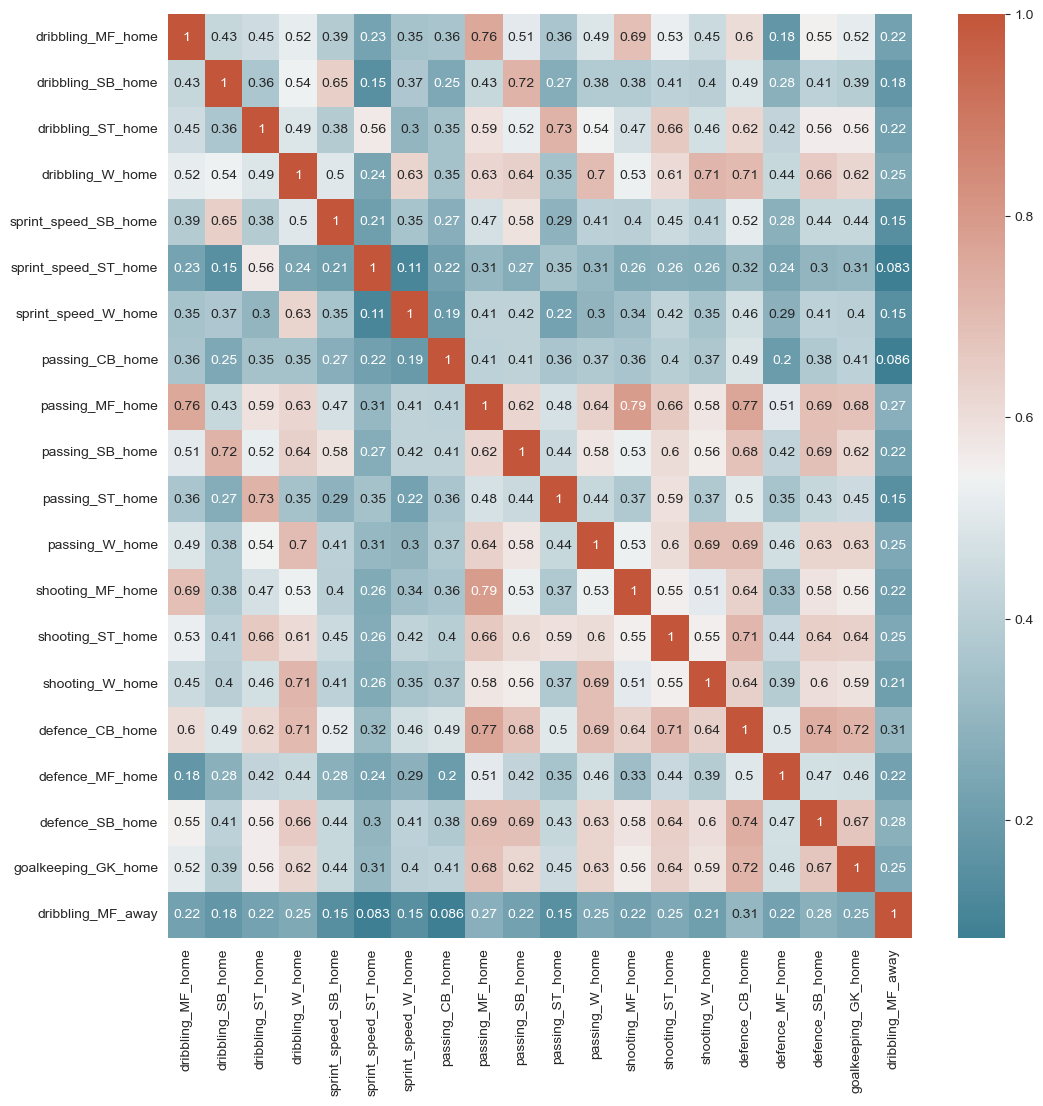

In [126]:
# Plot correlation heatmap
plt.subplots(figsize=(12,12))
sns.heatmap(model_df1.iloc[:, :20].corr(),annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

#### Observations: 
##### - there are constant high correlations between 'passing' and 'dribbling' of one position
Decision: remove 'drbbling' for all positions
##### - there's a high correlation between 'shooting_MF' and 'passing_MF'
Decision: remove 'shooting_MF'
##### - there are constant high correlations between different position which results from unclear reason. 
Decision: ignore

In [127]:
matches_new.head()

,sprint_speed_SB_home,sprint_speed_ST_home,sprint_speed_W_home,passing_CB_home,passing_MF_home,passing_SB_home,passing_ST_home,passing_W_home,shooting_ST_home,shooting_W_home,defence_CB_home,defence_SB_home,goalkeeping_GK_home,sprint_speed_SB_away,sprint_speed_ST_away,sprint_speed_W_away,passing_CB_away,passing_MF_away,passing_SB_away,passing_ST_away,passing_W_away,shooting_ST_away,shooting_W_away,defence_CB_away,defence_SB_away,goalkeeping_GK_away,result
0,76.5,78.5,71.5,59.67,78.00,62.67,64.17,74.33,65.7,70.70,77.62,81.50,81.0,73.5,67.0,76.00,51.67,73.00,67.33,53.17,71.00,64.0,68.3,69.42,64.50,73.0,win
1,51.0,70.5,62.0,53.17,63.17,43.33,57.67,64.75,68.0,63.35,64.50,59.12,72.2,73.0,73.0,68.75,63.83,59.00,61.33,49.33,59.50,71.0,60.1,69.50,63.62,69.4,win
2,78.0,85.0,78.0,71.00,76.00,77.33,68.67,79.17,81.4,67.80,75.31,74.38,81.4,67.5,66.0,73.00,68.67,66.89,60.50,54.00,59.33,38.2,67.4,72.25,70.50,74.6,win
3,38.0,73.5,68.0,51.67,68.17,53.17,62.00,63.67,66.5,48.60,71.50,51.88,27.0,77.0,81.0,74.50,53.17,77.67,71.25,56.33,74.50,64.9,53.9,71.88,74.50,80.4,win
4,64.0,64.0,78.5,71.00,64.78,49.33,48.00,69.50,61.4,71.30,80.38,47.75,77.6,80.5,84.0,69.50,65.00,74.78,70.50,65.67,63.83,65.2,67.1,77.50,72.62,67.2,tie


In [128]:
# Note features to drop
columns_to_drop = ['dribbling_MF_home', 'dribbling_SB_home', 'dribbling_ST_home', 'dribbling_W_home',
      'dribbling_MF_away', 'dribbling_SB_away', 'dribbling_ST_away', 'dribbling_W_away',
      'shooting_MF_home', 'shooting_MF_away']

### 3. Quick view on logistic modeling insights using statsmodel

In [129]:
model_df1 = model_df1.dropna()

In [130]:
y = model_df1['result']
X = model_df1.drop(['result'], axis = 1)

In [131]:
scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [132]:
X_transformed = scaler.transform(X)
transformed_df = pd.DataFrame(X_transformed, columns = X.columns)
transformed_df['result'] = matches_new['result']

In [133]:
transformed_df.head()

,dribbling_MF_home,dribbling_SB_home,dribbling_ST_home,dribbling_W_home,sprint_speed_SB_home,sprint_speed_ST_home,sprint_speed_W_home,passing_CB_home,passing_MF_home,passing_SB_home,passing_ST_home,passing_W_home,shooting_MF_home,shooting_ST_home,shooting_W_home,defence_CB_home,defence_MF_home,defence_SB_home,goalkeeping_GK_home,dribbling_MF_away,dribbling_SB_away,dribbling_ST_away,dribbling_W_away,sprint_speed_SB_away,sprint_speed_ST_away,sprint_speed_W_away,passing_CB_away,passing_MF_away,passing_SB_away,passing_ST_away,passing_W_away,shooting_MF_away,shooting_ST_away,shooting_W_away,defence_CB_away,defence_MF_away,defence_SB_away,goalkeeping_GK_away,result
0,0.752220,0.467742,0.738372,0.664615,0.713225,0.738024,0.570320,0.607019,0.760402,0.586720,0.612000,0.749090,0.832113,0.691120,0.725217,0.814073,0.711382,0.875342,0.907581,0.474138,0.628458,0.633721,0.600683,0.697479,0.565868,0.655499,0.462230,0.668426,0.688073,0.454857,0.671074,0.450397,0.669241,0.693086,0.615847,0.765898,0.589583,0.794118,win
1,0.570962,0.064516,0.540698,0.590769,0.283063,0.618263,0.390498,0.488211,0.462312,0.217707,0.519143,0.565459,0.330465,0.720721,0.597391,0.615105,0.403600,0.515361,0.797677,0.448276,0.430830,0.581395,0.593857,0.689076,0.655689,0.518266,0.685185,0.384162,0.577982,0.400000,0.440705,0.396825,0.759331,0.554806,0.617349,0.700139,0.574652,0.750000,win
2,0.791553,0.620968,0.895349,0.793846,0.738529,0.835329,0.693356,0.814111,0.720201,0.866438,0.676286,0.841863,0.797327,0.893179,0.674783,0.779042,0.577816,0.760817,0.912576,0.655172,0.391304,0.418605,0.614334,0.596639,0.550898,0.598713,0.773927,0.544365,0.562752,0.466714,0.437300,0.577976,0.337194,0.677909,0.668982,0.604673,0.691381,0.813725,win
3,0.851912,0.177419,0.656977,0.270769,0.063765,0.663174,0.504070,0.460793,0.562814,0.405457,0.581000,0.544758,0.575796,0.701416,0.340870,0.721262,0.257840,0.398906,0.233171,0.870690,0.750988,0.639535,0.641638,0.756303,0.775449,0.627106,0.489732,0.763249,0.760000,0.500000,0.741186,0.591270,0.680824,0.450253,0.662035,0.736964,0.759247,0.884804,win
4,0.549755,0.330645,0.534884,0.769231,0.502362,0.520958,0.702820,0.814111,0.494673,0.332189,0.381000,0.656508,0.523984,0.635779,0.735652,0.855930,0.655197,0.332475,0.865118,0.747069,0.636364,0.744186,0.607509,0.815126,0.820359,0.532463,0.706637,0.704569,0.746239,0.633429,0.527444,0.740675,0.684685,0.672850,0.767555,0.706638,0.727350,0.723039,tie


In [134]:
X_sm = sm.add_constant(X)

label_mapping = {'lose':0, 'tie':0.5, 'win':1}

y_sm = y.map(label_mapping)
log_reg = sm.Logit(y_sm, X_sm).fit()
print(log_reg.summary2())

Optimization terminated successfully.
         Current function value: 0.601872
         Iterations 5
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.107     
Dependent Variable:  result            AIC:               19720.6960
Date:                2023-08-03 21:22  BIC:               20020.9969
No. Observations:    16318             Log-Likelihood:    -9821.3   
Df Model:            38                LL-Null:           -10999.   
Df Residuals:        16279             LLR p-value:       0.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      5.0000                                         
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const                 0.0745   0.3547  0.2099 0.8337 -0.6207  0.7696
dribbling_MF_home     0.0095

#### Observation: 
##### - defence_MF_home has a negative coef., while defence_MF_away has a positive coef and P = 0.57. 
Decision: remove both 'defence_MF_home' and 'defence_MF_away'

In [135]:
model_df1 = model_df1.drop(['defence_MF_home','defence_MF_away'], axis = 1)

In [136]:
y = matches_new['result']
X = matches_new.drop(['result'], axis = 1)
scaler = MinMaxScaler()
scaler.fit(X)

X_transformed = scaler.transform(X)

#Create dataframe for visualization
transformed_df = pd.DataFrame(X_transformed, columns = X.columns)
transformed_df['result'] = matches_new['result']

In [137]:
X_sm = sm.add_constant(X)

label_mapping = {'lose':0, 'tie':0.5, 'win':1}

y_sm = y.map(label_mapping)
log_reg = sm.Logit(y_sm, X_sm).fit()
print(log_reg.summary2())

Optimization terminated successfully.
         Current function value: 0.603086
         Iterations 5
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.105     
Dependent Variable:  result            AIC:               19736.3281
Date:                2023-08-03 21:22  BIC:               19944.2287
No. Observations:    16318             Log-Likelihood:    -9841.2   
Df Model:            26                LL-Null:           -10999.   
Df Residuals:        16291             LLR p-value:       0.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      5.0000                                         
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const                 0.0834   0.3246  0.2569 0.7972 -0.5528  0.7197
sprint_speed_SB_home  0.0040

- Now all home team features have positive coef. and all away team features have negative coef.

In [138]:
# Update features to drop
columns_to_drop = ['dribbling_MF_home', 'dribbling_SB_home', 'dribbling_ST_home','dribbling_W_home', 
      'dribbling_MF_away', 'dribbling_SB_away', 'dribbling_ST_away', 'dribbling_W_away',
      'shooting_MF_home', 'shooting_MF_away', 'defence_MF_home','defence_MF_away']

### 4. Visualizae high dimensional data using PCA

In [139]:
for i in range(2,5):
    pca = PCA(n_components=i)
    X_pca_new = pca.fit_transform(X_transformed)
    print('n_components='+str(i))
    print(pca.explained_variance_ratio_)

n_components=2
[0.40826272 0.12060692]
n_components=3
[0.40826272 0.12060691 0.0502321 ]
n_components=4
[0.40826272 0.12060692 0.05023034 0.0369166 ]


In [140]:
pca = PCA(n_components=2)
X_pca_new = pca.fit_transform(X_transformed)

In [141]:
pca_df = pd.DataFrame(X_pca_new, columns = ['PC1', 'PC2'])
pca_df['result'] = y
pca_df.head()

,PC1,PC2,result
0,-0.191549,0.202146,win
1,0.485562,-0.185505,win
2,-0.217214,0.478339,win
3,0.281931,-0.502596,win
4,-0.015956,-0.263905,tie


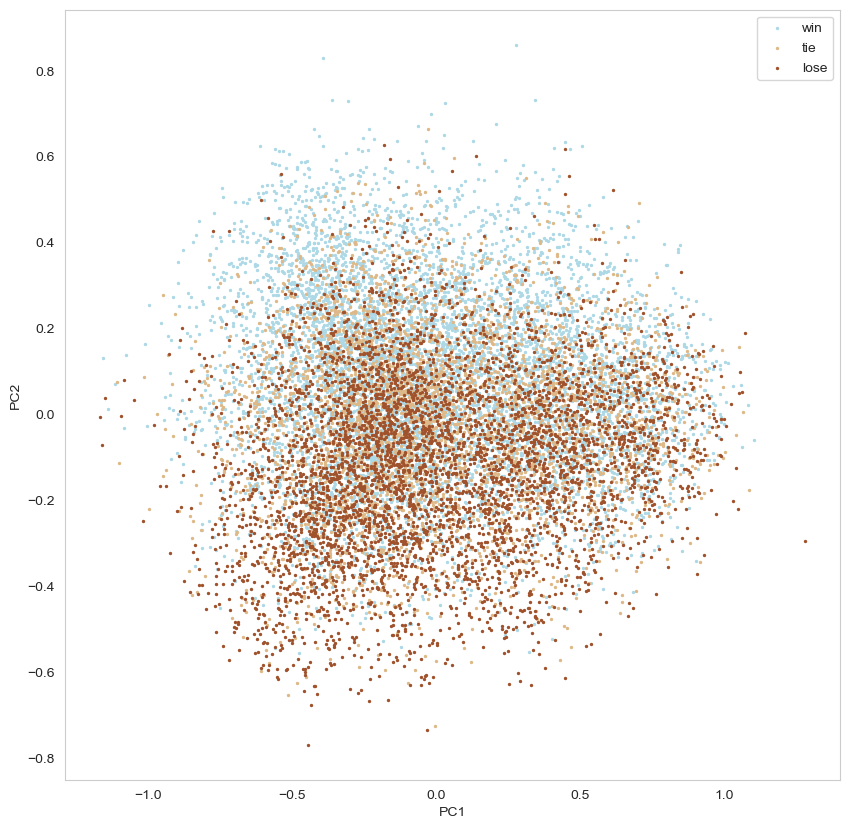

In [142]:
fig, axes = plt.subplots(figsize = (10,10))
results = ['win', 'tie', 'lose']
colors = ['lightblue', 'burlywood', 'sienna']

for result, color in zip(results, colors):
    indicesToKeep = pca_df['result'] == result
    axes.scatter(pca_df.loc[indicesToKeep, 'PC1'],
                 pca_df.loc[indicesToKeep, 'PC2'],
                 c=color,
                 label=result,
                 s=2)

axes.set_xlabel('PC1')
axes.set_ylabel('PC2')
axes.legend()
axes.grid()
plt.show()

- Not ideal, but can observe some patterns